In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Classification
try:
    X_class = pd.read_csv('../data/processed/X_classification.csv')
    y_class = pd.read_csv('../data/processed/y_classification.csv')
    # Régression
    X_reg = pd.read_csv('../data/processed/X_regression.csv')
    y_reg = pd.read_csv('../data/processed/y_regression.csv')
    
    print("Données chargées avec succès.")
    print(f"  Classification: {X_class.shape}")
    print(f"  Régression: {X_reg.shape}")

except FileNotFoundError:
    print("Erreur: Fichiers non trouvés. Vérifiez le chemin '../data/processed/'.")
    # Pour le test, on arrête si pas de données, sinon le reste plantera
    exit()

# Définition des noms des cibles pour la régression (utile pour l'affichage plus bas)
target_names = ['Quiz_Score_Avg', 'Project_Grade', 'Satisfaction_Rating', 'Time_Spent_Hours']

Données chargées avec succès.
  Classification: (56172, 42)
  Régression: (56172, 37)



PARTIE 1: CLASSIFICATION

Random Forest Accuracy:     0.5955
MLP Classifier Accuracy:      0.5541
Gradient Boosting Accuracy:   0.6109

Confusion Matrix (Random Forest):
[[3547 2140]
 [2405 3143]]

Confusion Matrix (MLP):
[[3260 2427]
 [2583 2965]]

Confusion Matrix (Gradient Boosting):
[[3533 2154]
 [2218 3330]]


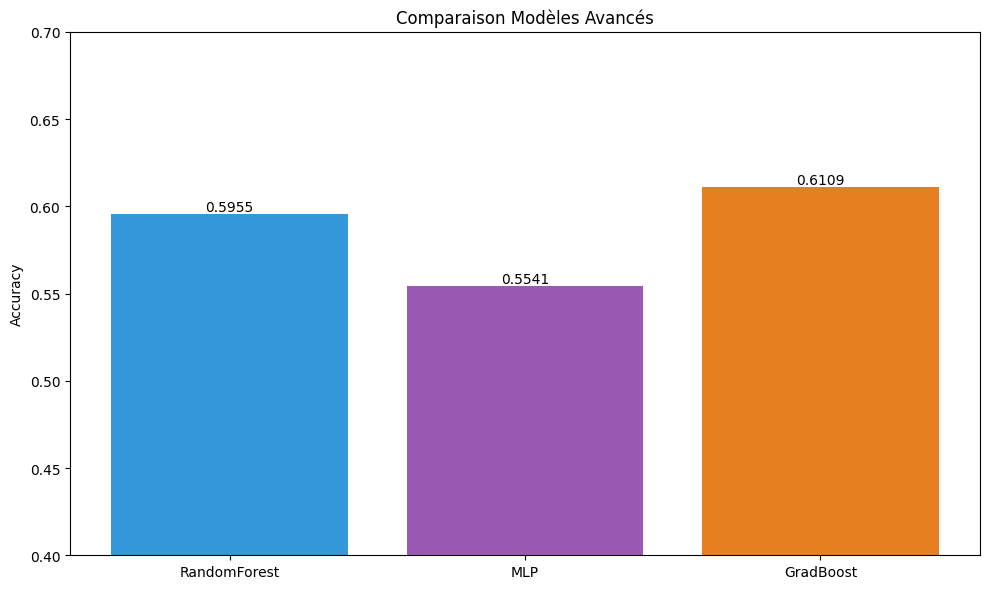

In [10]:
print("\nPARTIE 1: CLASSIFICATION\n")

# Split train/test (80% train, 20% test)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Raveler y pour sklearn (attend un vecteur 1D)
y_train_class = y_train_class.values.ravel()
y_test_class = y_test_class.values.ravel()

# Normalisation
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

# A. Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_class_scaled, y_train_class)
y_pred_rf = rf_clf.predict(X_test_class_scaled)
acc_rf = accuracy_score(y_test_class, y_pred_rf)
print(f"Random Forest Accuracy:     {acc_rf:.4f}")

# B. MLP Classifier (Réseau de Neurones)
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_clf.fit(X_train_class_scaled, y_train_class)
y_pred_mlp = mlp_clf.predict(X_test_class_scaled)
acc_mlp = accuracy_score(y_test_class, y_pred_mlp)
print(f"MLP Classifier Accuracy:      {acc_mlp:.4f}")

# C. Gradient Boosting Classifier (XGBoost-like)
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_class_scaled, y_train_class)
y_pred_gb = gb_clf.predict(X_test_class_scaled)
acc_gb = accuracy_score(y_test_class, y_pred_gb)
print(f"Gradient Boosting Accuracy:   {acc_gb:.4f}")

print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test_class, y_pred_rf))
print("\nConfusion Matrix (MLP):")
print(confusion_matrix(y_test_class, y_pred_mlp))
print("\nConfusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test_class, y_pred_gb))

# Visualisation Comparaison
models = ['RandomForest', 'MLP', 'GradBoost']
accuracies = [acc_rf, acc_mlp, acc_gb]
colors = ['#3498db', '#9b59b6', '#e67e22']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0.4, 0.7)
plt.title('Comparaison Modèles Avancés')
plt.ylabel('Accuracy')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [11]:
print("\nPARTIE 2: REGRESSION (Le Diagnostic)\n")
# Split train/test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Normalisation X
scaler_X_reg = StandardScaler()
X_train_reg_scaled = scaler_X_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_X_reg.transform(X_test_reg)

# Normalisation y (Crucial pour comparaison PyTorch)
scaler_y_reg = StandardScaler()
y_train_reg_scaled = scaler_y_reg.fit_transform(y_train_reg)
y_test_reg_scaled = scaler_y_reg.transform(y_test_reg)

# A. Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg_scaled)

# Prédiction et Inversion
y_pred_lin_scaled = lin_reg.predict(X_test_reg_scaled)
y_pred_lin = scaler_y_reg.inverse_transform(y_pred_lin_scaled)
y_test_reg_inv = scaler_y_reg.inverse_transform(y_test_reg_scaled)

rmse_lin_global = np.sqrt(mean_squared_error(y_test_reg_inv, y_pred_lin))

print(f"Linear Regression GLOBAL RMSE: {rmse_lin_global:.4f}\n")

print("Détail par variable (LINEAR REGRESSION) :\n")
for i, name in enumerate(target_names):
    rmse = np.sqrt(mean_squared_error(y_test_reg_inv[:, i], y_pred_lin[:, i]))
    r2 = r2_score(y_test_reg_inv[:, i], y_pred_lin[:, i])
    flag = "SUCCES" if r2 > 0.8 else "FAIBLE"
    print(f"{name:<20} | RMSE: {rmse:.4f} | R²: {r2:.4f} {flag}")


PARTIE 2: REGRESSION (Le Diagnostic)

Linear Regression GLOBAL RMSE: 6.4131

Détail par variable (LINEAR REGRESSION) :

Quiz_Score_Avg       | RMSE: 12.2523 | R²: 0.0553 FAIBLE
Project_Grade        | RMSE: 0.6145 | R²: 0.9984 SUCCES
Satisfaction_Rating  | RMSE: 0.7040 | R²: 0.0114 FAIBLE
Time_Spent_Hours     | RMSE: 3.6771 | R²: 0.0559 FAIBLE


In [15]:
# B. Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_reg_scaled, y_train_reg_scaled)

# Prédiction et Inversion
y_pred_rf_scaled = rf_reg.predict(X_test_reg_scaled)
y_pred_rf_reg = scaler_y_reg.inverse_transform(y_pred_rf_scaled)

rmse_rf_global = np.sqrt(mean_squared_error(y_test_reg_inv, y_pred_rf_reg))

print(f"Random Forest GLOBAL RMSE: {rmse_rf_global:.4f}\n")

print("Détail par variable (RANDOM FOREST) :")
for i, name in enumerate(target_names):
    rmse = np.sqrt(mean_squared_error(y_test_reg_inv[:, i], y_pred_rf_reg[:, i]))
    r2 = r2_score(y_test_reg_inv[:, i], y_pred_rf_reg[:, i])
    flag = "SUCCES" if r2 > 0.8 else "FAIBLE"
    print(f"{name:<20} | RMSE: {rmse:.4f} | R²: {r2:.4f} {flag}")

# C. Gradient Boosting Regressor (Amélioration)
# Note: GradientBoostingRegressor ne supporte pas le multi-output nativement, on utilise MultiOutputRegressor
gb_reg = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, random_state=42))
gb_reg.fit(X_train_reg_scaled, y_train_reg_scaled)

# Prédiction et Inversion
y_pred_gb_scaled = gb_reg.predict(X_test_reg_scaled)
y_pred_gb_reg = scaler_y_reg.inverse_transform(y_pred_gb_scaled)

rmse_gb_global = np.sqrt(mean_squared_error(y_test_reg_inv, y_pred_gb_reg))

print(f"Gradient Boosting GLOBAL RMSE: {rmse_gb_global:.4f}\n")

print("Détail par variable (GRADIENT BOOSTING) :")
for i, name in enumerate(target_names):
    rmse = np.sqrt(mean_squared_error(y_test_reg_inv[:, i], y_pred_gb_reg[:, i]))
    r2 = r2_score(y_test_reg_inv[:, i], y_pred_gb_reg[:, i])
    flag = "SUCCES" if r2 > 0.8 else "FAIBLE"
    print(f"{name:<20} | RMSE: {rmse:.4f} | R²: {r2:.4f} {flag}")

Random Forest GLOBAL RMSE: 9.8608

Détail par variable (RANDOM FOREST) :
Quiz_Score_Avg       | RMSE: 12.4615 | R²: 0.0228 FAIBLE
Project_Grade        | RMSE: 14.8066 | R²: 0.0645 FAIBLE
Satisfaction_Rating  | RMSE: 0.7131 | R²: -0.0146 FAIBLE
Time_Spent_Hours     | RMSE: 3.7300 | R²: 0.0285 FAIBLE
Gradient Boosting GLOBAL RMSE: 9.5688

Détail par variable (GRADIENT BOOSTING) :
Quiz_Score_Avg       | RMSE: 12.2894 | R²: 0.0496 FAIBLE
Project_Grade        | RMSE: 14.1854 | R²: 0.1413 FAIBLE
Satisfaction_Rating  | RMSE: 0.7041 | R²: 0.0109 FAIBLE
Time_Spent_Hours     | RMSE: 3.6741 | R²: 0.0574 FAIBLE



Affichage du graphique pour Project_Grade


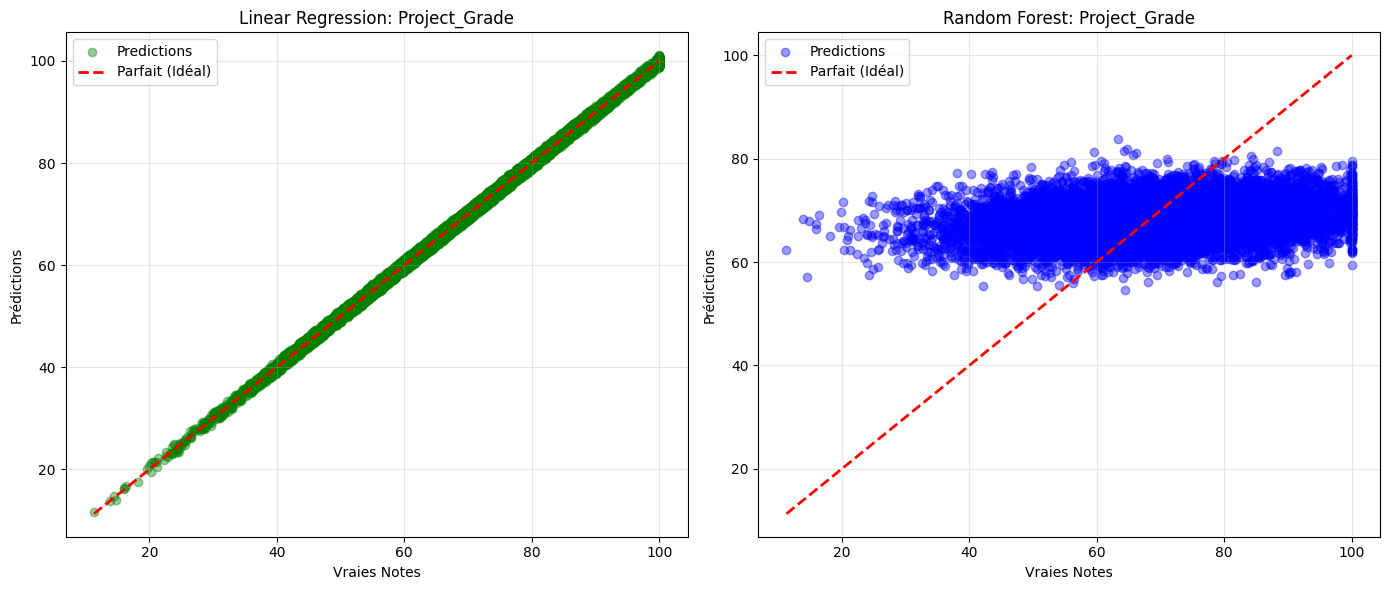

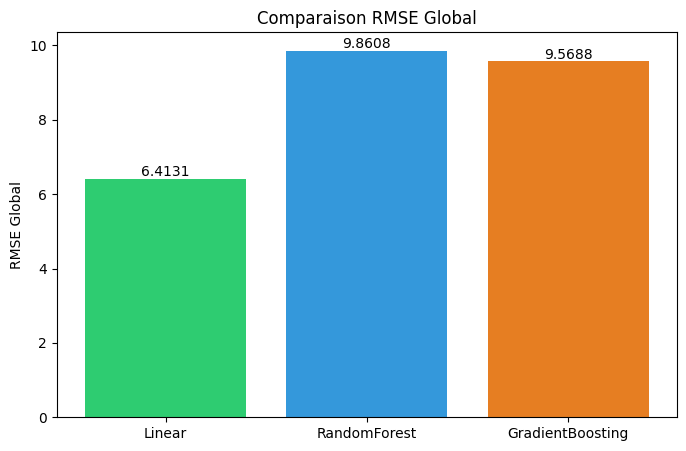

In [13]:
print("\nAffichage du graphique pour Project_Grade")

idx = 1 # Index de Project_Grade
name = target_names[idx]

plt.figure(figsize=(14, 6))

# Plot 1: Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg_inv[:, idx], y_pred_lin[:, idx], alpha=0.4, color='green', label='Predictions')
# Ligne idéale
min_val = y_test_reg_inv[:, idx].min()
max_val = y_test_reg_inv[:, idx].max()
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Parfait (Idéal)')
plt.title(f'Linear Regression: {name}')
plt.xlabel('Vraies Notes')
plt.ylabel('Prédictions')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test_reg_inv[:, idx], y_pred_rf_reg[:, idx], alpha=0.4, color='blue', label='Predictions')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Parfait (Idéal)')
plt.title(f'Random Forest: {name}')
plt.xlabel('Vraies Notes')
plt.ylabel('Prédictions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparaison des RMSE globaux
models_reg = ['Linear', 'RandomForest', 'GradientBoosting']
rmses_reg = [rmse_lin_global, rmse_rf_global, rmse_gb_global]
colors_reg = ['#2ecc71', '#3498db', '#e67e22']

plt.figure(figsize=(8, 5))
bars = plt.bar(models_reg, rmses_reg, color=colors_reg)
plt.title('Comparaison RMSE Global')
plt.ylabel('RMSE Global')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')
plt.show()